### TODO:
* load MSE val and train values from a **regression** model 
* load MSE val and train values from a **reg-clas** model
* make a plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

### Load MSE data

In [2]:
regression_model_MSE_path = "/data/cornucopia/jz522/experiments/2021-05-15/fpn_resnet__bs16__LR5e-4__w11_2021-05-15_17:46:25/train_history.json"
reg_clas_model_MSE_path = "/data/cornucopia/jz522/experiments/2021-05-16/FPN_resnet_bs16_LR5e-4_w11_2021-05-16_18:06:10/MSE_metric.json"
reg_clas_model_w10_1_MSE_path = "/data/cornucopia/jz522/experiments/2021-05-18/FPN_resnet_bs16_LR5e-4_w10-1_2021-05-18_11:32:32/MSE_metric.json"


# load data - regression model
with open(regression_model_MSE_path) as json_file:
    data = json.load(json_file)
    train_regression_MSE = data['loss']
    val_regression_MSE = data['val_loss']
    
    
    
    
    
# load data - reg-clas model
with open(reg_clas_model_MSE_path) as json_file:
    data = json.load(json_file)
    train_reg_clas_MSE = data['train_MSE']
    train_reg_clas_MSE_90th = data['train_MSE_90th']
    val_reg_clas_MSE = data['val_MSE']
    val_reg_clas_MSE_90th = data['val_MSE_90th']

tmp = "/data/cornucopia/jz522/experiments/2021-05-17/FPN_resnet_bs16_LR5e-4_w11_CONTINUED_2021-05-17_06:36:41/MSE_metric.json"
with open(tmp) as json_file:
    data = json.load(json_file)
    train_tmp = data['train_MSE']
    train_tmp_90th = data['train_MSE_90th']
    val_tmp_MSE = data['val_MSE']
    val_tmp_MSE_90th = data['val_MSE_90th']
    
    train_reg_clas_MSE = np.concatenate((train_reg_clas_MSE, [train_reg_clas_MSE[-1]]*140), axis=0)
    train_reg_clas_MSE_90th = np.concatenate((train_reg_clas_MSE_90th, [train_reg_clas_MSE_90th[-1]]*140), axis=0)
    val_reg_clas_MSE = np.concatenate((val_reg_clas_MSE, [val_reg_clas_MSE[-1]]*140), axis=0)
    val_reg_clas_MSE_90th = np.concatenate((val_reg_clas_MSE_90th, [val_reg_clas_MSE_90th[-1]]*140), axis=0)    
    
    train_reg_clas_MSE = np.concatenate((train_reg_clas_MSE, train_tmp), axis=0)
    train_reg_clas_MSE_90th = np.concatenate((train_reg_clas_MSE_90th, train_tmp_90th), axis=0)
    val_reg_clas_MSE = np.concatenate((val_reg_clas_MSE, val_tmp_MSE), axis=0)
    val_reg_clas_MSE_90th = np.concatenate((val_reg_clas_MSE_90th, val_tmp_MSE_90th), axis=0)
  


    
    
# load data - reg_clas model weights 10-to-1
with open(reg_clas_model_w10_1_MSE_path) as json_file:
    data = json.load(json_file)
    train_reg_clas_w10_1_MSE = data['train_MSE']
    train_reg_clas_w10_1_MSE_90th = data['train_MSE_90th']
    val_reg_clas_w10_1_MSE = data['val_MSE']
    val_reg_clas_w10_1_MSE_90th = data['val_MSE_90th']

## Train

In [3]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

### log-scale

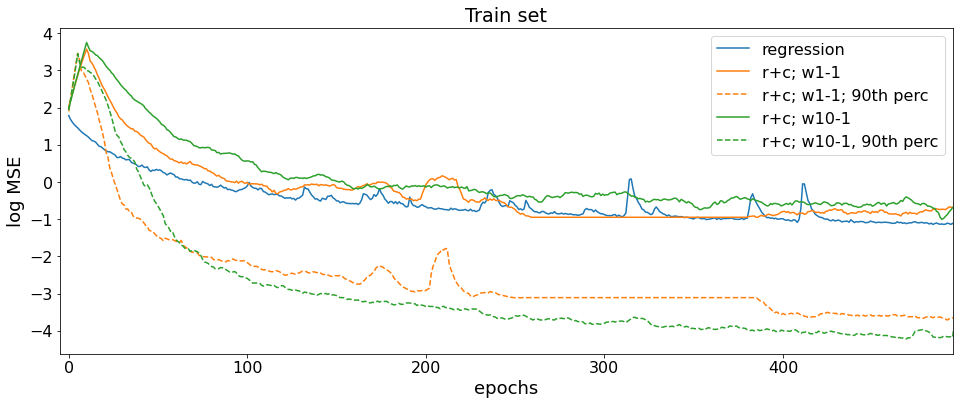

In [5]:
plt.rcParams.update({'font.size': 16})
font_size = 18

plt.figure(figsize=(16,6))

plt.plot(np.arange(len(train_regression_MSE)), np.log(train_regression_MSE), label='regression')
plt.plot(np.arange(len(train_reg_clas_MSE)), smooth(np.log(train_reg_clas_MSE),20), color='tab:orange',label='r+c; w1-1')
plt.plot(np.arange(len(train_reg_clas_MSE_90th)), smooth(np.log(train_reg_clas_MSE_90th),10), '--', color='tab:orange',label='r+c; w1-1; 90th perc')

plt.plot(np.arange(len(train_reg_clas_w10_1_MSE)), smooth(np.log(train_reg_clas_w10_1_MSE),20), color='tab:green', label='r+c; w10-1')
plt.plot(np.arange(len(train_reg_clas_w10_1_MSE_90th)), smooth(np.log(train_reg_clas_w10_1_MSE_90th),10), '--', color='tab:green',label='r+c; w10-1, 90th perc')

plt.legend(fontsize=font_size-2)
plt.xlabel('epochs', fontsize=font_size)
plt.ylabel('log MSE', fontsize=font_size)
plt.title('Train set')
plt.xlim((-5,495))
plt.show()

### Validation

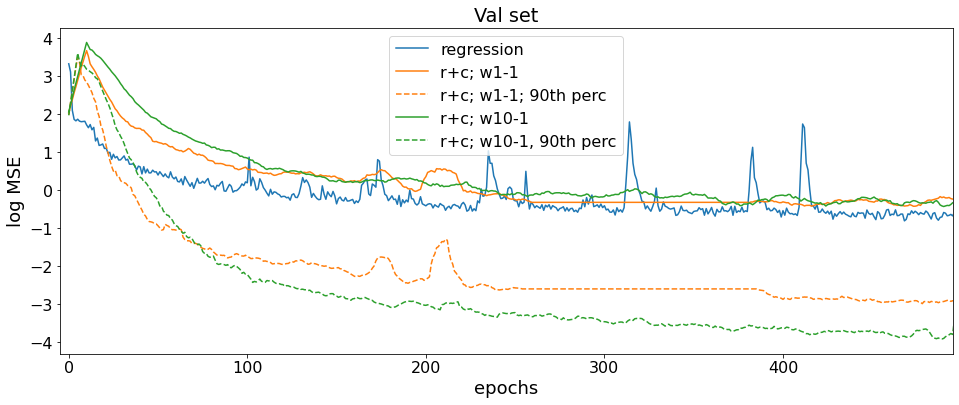

In [24]:
plt.rcParams.update({'font.size': 16})
font_size = 18

plt.figure(figsize=(16,6))

plt.plot(np.arange(len(val_regression_MSE)), np.log(val_regression_MSE), label='regression')
plt.plot(np.arange(len(val_reg_clas_MSE)), smooth(np.log(val_reg_clas_MSE),20), color='tab:orange',label='r+c; w1-1')
plt.plot(np.arange(len(val_reg_clas_MSE_90th)), smooth(np.log(val_reg_clas_MSE_90th),10), '--', color='tab:orange',label='r+c; w1-1; 90th perc')

plt.plot(np.arange(len(val_reg_clas_w10_1_MSE)), smooth(np.log(val_reg_clas_w10_1_MSE),20), color='tab:green', label='r+c; w10-1')
plt.plot(np.arange(len(val_reg_clas_w10_1_MSE_90th)), smooth(np.log(val_reg_clas_w10_1_MSE_90th),10), '--', color='tab:green',label='r+c; w10-1, 90th perc')

plt.legend(fontsize=font_size-2)
plt.xlabel('epochs', fontsize=font_size)
plt.ylabel('log MSE', fontsize=font_size)
plt.title('Val set')
plt.xlim((-5,495))
plt.show()

# comparison simple vs. complex whitenning

In [25]:
tmp = "/data/cornucopia/jz522/experiments/2021-05-18/FPN_resnet_bs16_LR5e-4_w1-1_simple_whitenning_2021-05-18_13:33:29/MSE_metric.json"    
# load data - reg_clas model weights 1-to-1 - complex whitenning
with open(tmp) as json_file:
    data = json.load(json_file)
    train_reg_clas_SW_w1_1_MSE = data['train_MSE']
    train_reg_clas_SW_w1_1_MSE_90th = data['train_MSE_90th']
    val_reg_clas_SW_w1_1_MSE = data['val_MSE']
    val_reg_clas_SW_w1_1_MSE_90th = data['val_MSE_90th']
    
    

tmp = "/data/cornucopia/jz522/experiments/2021-05-18/FPN_resnet_bs16_LR5e-4_w10-1_simple_whitenning_2021-05-18_13:32:41/MSE_metric.json"
# load data - reg_clas model weights 10-to-1 - complex whitenning
with open(tmp) as json_file:
    data = json.load(json_file)
    train_reg_clas_SW_w10_1_MSE = data['train_MSE']
    train_reg_clas_SW_w10_1_MSE_90th = data['train_MSE_90th']
    val_reg_clas_SW_w10_1_MSE = data['val_MSE']
    val_reg_clas_SW_w10_1_MSE_90th = data['val_MSE_90th']

## plots

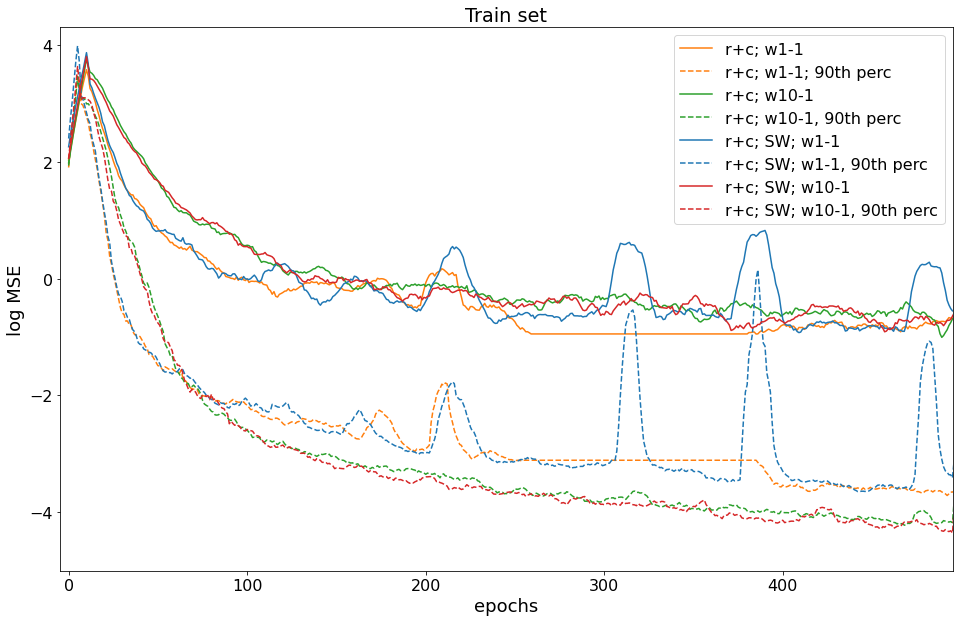

In [35]:
plt.rcParams.update({'font.size': 16})
font_size = 18

plt.figure(figsize=(16,10))

plt.plot(np.arange(len(train_reg_clas_MSE)), smooth(np.log(train_reg_clas_MSE),20), color='tab:orange',label='r+c; w1-1')
plt.plot(np.arange(len(train_reg_clas_MSE_90th)), smooth(np.log(train_reg_clas_MSE_90th),10), '--', color='tab:orange',label='r+c; w1-1; 90th perc')

plt.plot(np.arange(len(train_reg_clas_w10_1_MSE)), smooth(np.log(train_reg_clas_w10_1_MSE),20), color='tab:green', label='r+c; w10-1')
plt.plot(np.arange(len(train_reg_clas_w10_1_MSE_90th)), smooth(np.log(train_reg_clas_w10_1_MSE_90th),10), '--', color='tab:green',label='r+c; w10-1, 90th perc')

plt.plot(np.arange(len(train_reg_clas_SW_w1_1_MSE)), smooth(np.log(train_reg_clas_SW_w1_1_MSE),20), color='tab:blue', label='r+c; SW; w1-1')
plt.plot(np.arange(len(train_reg_clas_SW_w1_1_MSE_90th)), smooth(np.log(train_reg_clas_SW_w1_1_MSE_90th),10), '--', color='tab:blue',label='r+c; SW; w1-1, 90th perc')

plt.plot(np.arange(len(train_reg_clas_SW_w10_1_MSE)), smooth(np.log(train_reg_clas_SW_w10_1_MSE),20), color='tab:red', label='r+c; SW; w10-1')
plt.plot(np.arange(len(train_reg_clas_SW_w10_1_MSE_90th)), smooth(np.log(train_reg_clas_SW_w10_1_MSE_90th),10), '--', color='tab:red',label='r+c; SW; w10-1, 90th perc')

plt.legend(fontsize=font_size-2)
plt.xlabel('epochs', fontsize=font_size)
plt.ylabel('log MSE', fontsize=font_size)
plt.title('Train set')
plt.xlim((-5,495))
plt.ylim((-5,4.3))
plt.show()

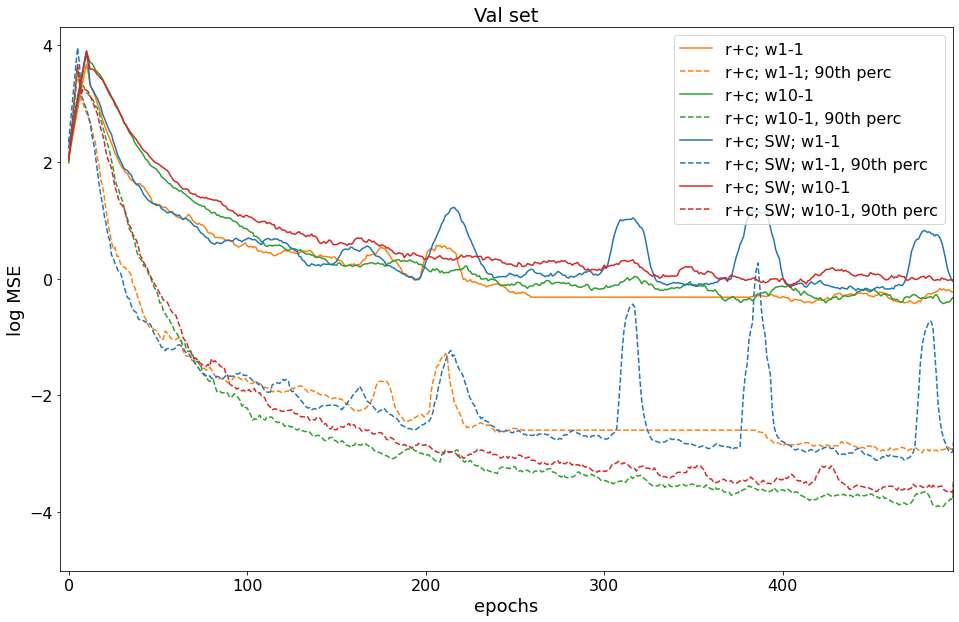

In [37]:
plt.rcParams.update({'font.size': 16})
font_size = 18

plt.figure(figsize=(16,10))

plt.plot(np.arange(len(val_reg_clas_MSE)), smooth(np.log(val_reg_clas_MSE),20), color='tab:orange',label='r+c; w1-1')
plt.plot(np.arange(len(val_reg_clas_MSE_90th)), smooth(np.log(val_reg_clas_MSE_90th),10), '--', color='tab:orange',label='r+c; w1-1; 90th perc')

plt.plot(np.arange(len(val_reg_clas_w10_1_MSE)), smooth(np.log(val_reg_clas_w10_1_MSE),20), color='tab:green', label='r+c; w10-1')
plt.plot(np.arange(len(val_reg_clas_w10_1_MSE_90th)), smooth(np.log(val_reg_clas_w10_1_MSE_90th),10), '--', color='tab:green',label='r+c; w10-1, 90th perc')

plt.plot(np.arange(len(val_reg_clas_SW_w1_1_MSE)), smooth(np.log(val_reg_clas_SW_w1_1_MSE),20), color='tab:blue', label='r+c; SW; w1-1')
plt.plot(np.arange(len(val_reg_clas_SW_w1_1_MSE_90th)), smooth(np.log(val_reg_clas_SW_w1_1_MSE_90th),10), '--', color='tab:blue',label='r+c; SW; w1-1, 90th perc')

plt.plot(np.arange(len(val_reg_clas_SW_w10_1_MSE)), smooth(np.log(val_reg_clas_SW_w10_1_MSE),20), color='tab:red', label='r+c; SW; w10-1')
plt.plot(np.arange(len(val_reg_clas_SW_w10_1_MSE_90th)), smooth(np.log(val_reg_clas_SW_w10_1_MSE_90th),10), '--', color='tab:red',label='r+c; SW; w10-1, 90th perc')

plt.legend(fontsize=font_size-2)
plt.xlabel('epochs', fontsize=font_size)
plt.ylabel('log MSE', fontsize=font_size)
plt.title('Val set')
plt.xlim((-5,495))
plt.ylim((-5,4.3))
plt.show()